# A Brief Guide to the Fundamentals of Machine Learning

# Table of Contents

1. [Introduction](#introduction)
    1. [Purpose](#introduction_purpose)
    2. [Why the Mathematics Are Important](#introduction_why)
    3. [Python Imports](#introduction_python)
2. [Intuition Pumps: Patterns and False Friends; and Linear Functions](#linear)
    1. [First Thoughts](#linear_firstthoughts)
    2. [Our First Model: Feet and Centimetres](#linear_firstmodel)
    3. [Linearity](#linear_linearity)
    4. [Functions, Generalisation and Abstraction](#linear_functions)

## 1. <a id='introduction' style='outline:0;'>Introduction</a>
### <a id='introduction_purpose'>Purpose</a>
This guide is intended for students of computer science who have chosen to narrow their focus to machine learning. Underlying machine learning is a statistical basis, which for most, including myself, is hard to grasp. Unfortunately it is essential; yet it is difficult to understand at first, as it requires you to twist your thinking in counter-intuitive ways. Perhaps you have read the books on the matter, but the language is so opaque, that it makes you wonder whether anyone _really_ understands it.

At all points I will try to enunciate as clearly as I can the concepts, terms or turns of phrase that one encounters frequently in machine learning. There is a [glossary](#glossary) at the end of the notebook that should elucidate the meaning of the most commonly-used phrases and terms in machine learning. Any imagery will be accompanied by concrete examples.

Note that this is an interactive notebook. **Should anything still be unclear, or if I have expressed myself poorly, _please tell me:_** my email is [788486@swansea.ac.uk](mailto:788486@swansea.ac.uk).

### <a id='introduction_why'>Why the Mathematics Are Important</a>

In the production of this notebook, there has been heated disagreement about the utility of teaching mathematics to computer science students. The argument goes something like this: The code-libraries for machine learning are well stocked and well supported. Any mathematical efforts beyond the originators' are superfluous. One only needs to put the various modules together and all is well.

If you are satisfied with the most meagre knowledge, with the bare minimum that will get you through life&mdash;then close this notebook, because it is not for you.

If you want to dig deeper, however; if you want to understand *why* machine learning works; if you feel a deep frustration when you have no choice but to swallow course-material; then read this, and a whole world of learning will open before you.

Crucially, however, you will **learn new ways to think,** as you abandon old ways of thinking and in their place establish new ones. Mathematics is not merely numbers and symbols: it is the epitome of reason. (Indeed, until the 19th century at least, philosophy, mathematics and all sciences&mdash;natural and social&mdash;were considered one and the same.) In machine learning, you will be building models consciously and deliberately. The choices you make will be on the basis of mathematics, consciously or not. In learning these mathematics, you will become a better programmer, architect&mdash;and thinker.

### <a id='introduction_python'>Python Imports</a>

`Numpy` is a library that enables matrix and vector mathematics in Python. Python is too slow for computing these mathematics, and as `Numpy` is written in C, it is faster by orders.

`Matplotlib` is a library for plotting graphs. We will be using these in our concrete examples.

In [36]:
import numpy as np # This Python library enables [matrix](#gloss_matrix) and vector mathematics
import matplotlib.pyplot as plt # A library to plot graphs

### <a id='linear'>2. Intuition Pumps: Patterns and False Friends; and Linear Functions</a>

In this section we work the obstacles an absolute beginner will encounter. I have tried to relate this writing back to my experiences as an undergraduate. I struggled immensely with the course-content. I am hoping you can learn from me.

***

#### <a id='linear_firstthoughts'>First Thoughts</a>

Any course on machine learning will tell you that the goal of machine learning is to find patterns in data. When I first heard this during my undergraduate degree, my thoughts were various:

* How am I supposed to know which 'pattern' this data has? Is there a bank of 'patterns' to fit?
* How does a computer know what a pattern is?
* Without knowing all the data in the world, how can a computer see something new and work out what it is?

The first referent is the human. Firstly I thought, 'As a human, how do I recognise patterns?' This question in turn leads to wider philosophical questions, and while interesting, it isn't when you're an undergraduate student trying to understand what Bayesian priors and posteriors are, and is conducive to existential crises.

Unfortunately **it's better to simply ignore all comparisons to human pattern-finding**; it's frequently a false friend. So let's build everything up from the ground, starting with the most relatable concept I could think of.

#### <a id='linear_firstmodel'>Our First Model: Feet and Centimetres</a>

Do you remember fitting lines of best fit to a graph with a set of points? That's machine learning in its most basic form. That line is what we term a [model](#gloss_model). That set of points through which we draw our line is our [dataset](#gloss_dataset). The line describes the relationship or [pattern](#gloss_pattern) between two values or [variables](#gloss_variable).

The conversion from feet to centimetres is exact: if you know someone's height in feet, you know their height in centimetres. The rate is exact: 1 foot is 30.48 centimetres (to four significant figures). We can also state this fact algebraically: Suppose the height in feet is a [variable](#gloss_variable) $x$. The height in centimetres $y$ is given by $$y=30.48\cdot x.$$ Conversely, supposing the height in centimetres is a random variable $y$, the height in feet is defined as $$x=\frac{y}{30.48}.$$

Below I have written Python code that implements the above example. First we make some [observations](#gloss_observations) of the height in feet. Then we convert these measurements to centimetres by multiplying the observations by 30.48. Then we plot the two variables against one another.

Our height measurements in feet: [ 0  1  2  3  4  5  6  7  8  9 10]
Our height measurements in centimetres: [  0.    30.48  60.96  91.44 121.92 152.4  182.88 213.36 243.84 274.32
 304.8 ]


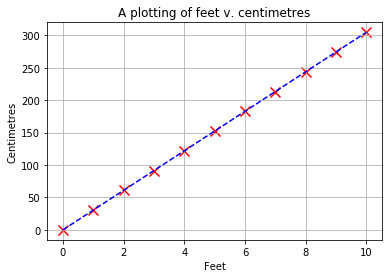

In [33]:
# An array from 0 to 10 inclusive.
height_in_feet = np.arange(0, 11) # We called this the random variable x above.
print('Our height measurements in feet:', height_in_feet)

# Multiply the heigh in feet by 30.48 to obtain the height in centimetres
height_in_centimetres = height_in_feet * 30.48 # We called this the random variable y above.
print('Our height measurements in centimetres:', height_in_centimetres)

# Now we can plot the two variables against each other.
# First we plot points as a scatter graph.
plt.scatter(height_in_feet, # x-values
            height_in_centimetres, # y-values
            marker='x', # The shape of the markers of the points, an ex.
            c='r', # The colour of the markers, red.
            s=100, # The size of the marker.
           )
# Then we use the coordinates to plot blue line over the top.
# This happens to be the line of best fit, too.
plt.plot(height_in_feet, height_in_centimetres, linestyle='dashed', c='b') # The colour is blue this time.

# Add labels to the plot.
plt.title('A plotting of feet v. centimetres')
plt.xlabel('Feet')
plt.ylabel('Centimetres')

# Adding a grid to make interpretation easier.
plt.grid()

# Show the plot in the notebook
plt.show()

#### <a id='linear_linearity'>Linearity</a>

Notice that by plotting the line through the points marking the observations, we have also produced a line of best fit. Moreover, the line of best fit is a *straight line*. If we look back at our equation for $x$ and $y$, we will see why this makes sense. The relationship between $x$ and $y$ is $y = 30.48 \cdot x$. This should look familiar. Before you came to university, you almost certainly learned the equation for a line: $y = m \cdot x + c$. This equation's form is *identical* to the form of $y = 30.48 \cdot$, except $c = 0$ and so it is mising. For this reason, we can say that **the relationship between this $x$ and $y$ is [linear](#gloss_linearity) because it forms a line on the graph**.

#### <a id='linear_functions'>Functions, Generalisation and Abstraction</a>

Notice that we are now speaking of feet and centimetres as $x$ and $y$. This initially served to simplify the notation in the mathematics. But, as we will see, this use will unite us with far greater concepts in machine learning.

Firstly, we can be sure that $y=30.48 \cdot x$ will tell us the value of $y$ for every value of $x$ and *vice versa*. So we may say we have find the *general* relationship between $x$ and $y$.

Secondly, suppose we do not know how feet and centimetres are related. One option is a [closed-form solution](#gloss_closedform_solution), where we work out $x$ and $y$ from actual measurements, and rearrange the equation $y=m\cdot x+c$ to solve for the gradient $m$ and $c$. But there is an implicit assumption to this approach: We are assuming that the relationship between $x$ and $y$ is linear. What if we do not know the *nature* of the relationship? Perhaps it is not linear. But we know that there is *some* relationship.

Where we know neither this relationship nor its nature, there is a clean mathematical notation to describe that relationship: a [function](#gloss_function), usually denoted $f$. We know that there *is* a relationship between $x$ and $y$, so we can describe it mathematically: $$y=f(x)$$ and its inverse $$x=f^\prime(y).$$

What we have done here is **abstract** the relationship between $x$ and $y$, insomuch as we have removed all particulars; i.e., the factor 30.48 is gone.

We can abstract the case even more: $x$ and $y$ simply do not have to represent anything in particular. The equation $y=f(x)$ describes the relationship of $x$ and $y$; but it could just as easily describe $w$ and $z$: $z = f(w)$. The two are equivalent. The variables $x$, $y$, $w$ and $z$ do not stand for a particular thing right now. Thus we have abstracted the relationship.

#### <a id='linear_object'>The Object of Machine Learning: Finding the Best Function</a>

This is the driving purpose of machine learning: If I know a value $x$, what function $f$ will most accurately predict $y$? Here are some examples to help you think about what kind of problems we might have:
* If I have a hand ($x$) in a game of poker, what set of moves ($y$) will give me a victory?
* If I am age ($x$), how likely ($y$) am I to develop Alzheimer's?
* Given life, the universe and everything ($x$), what is its meaning ($y$)?

## Notes

General is not the same as exact.

## <a id='glossary'>Glossary</a>

The below-stated words are not definitions, so **do not cite these descriptions in your reports or formal academic work**. The purpose of this glossary is to aid your comprehension. Notwithstanding this caveat, they should not conflict with what you learn.

<a id='gloss_closedform_solution'>**Closed-form solution**</a> &ndash; 

<a id='gloss_constant'>**Constant**</a> &ndash; A variable with a fixed value.

<a id='gloss_function'>**Function**</a> &ndash; A function is frequently used to describe 

<a id='gloss_independent_variable'>**Independent variable**</a> &ndash; A factor that determines or influences a dependent variable.

<a id='gloss_linearity'>**Linearity**</a> &ndash; Linearity is the noun given to the following property: Two variables $x$ and $y$ are linearly related to each other if their relationship can be described in the form $y=m\cdot x+c$. In other words, if we add $p$ to $x$, then we can find the value of $y$ by adding $m \cdot p + c$.

<a id='gloss_observations'>**Observations**</a> &ndash; An observation of a variable is a record of the variable's taking on a value. For example, for a variable $x$, an observation of $x$ may be when $x=1$. An observation of height is 250cm. Without a particular value, $x$ is yet a variable, and height is an undefined quality.

<a id='gloss_predictors'>**Predictors**</a> &ndash; *See [independent variable](#gloss_independent_variable).*

<a id='gloss_random_variable'>**Random variable**</a> &ndash; A random variable can take on any value without any restriction on what value that variable will take. If the domain of a variable is $\left[-\infty, \infty\right]$ It is used as a placeholder. If we define a function on a random variable, we are saying, 'This function applies to all values.'

<a id='gloss_variable'>**Variable**</a> &ndash; A variable represents an unknown numerical value. (This definition is lifted from the [*Encyclopaedia Britannica*](https://www.britannica.com/topic/variable-mathematics-and-logic).)